In [103]:
import pandas as pd
import numpy as np

In [104]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [105]:
data=pd.read_csv("game data.csv")
df=pd.DataFrame(data)

In [106]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [107]:
x=df.drop('Days',axis=1)

In [108]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [109]:

from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [110]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [111]:
x

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [112]:
x=df.drop('Wear Jacket?',axis=1)

In [113]:
x

,Days,Outlook,Temprature,Routine
0,1,Sunny,Cold,Indoor
1,2,Cloudy,Cold,Indoor
2,3,Cloudy,Warm,Outdoor
3,4,Sunny,Cold,Outdoor
4,5,Cloudy,Cold,Outdoor
5,6,Sunny,Warm,Outdoor
6,7,Cloudy,Warm,Indoor
7,8,Sunny,Warm,Indoor


In [114]:
y=df['Wear Jacket?']

In [115]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [116]:
x['Outlook'].unique()

array(['Sunny', 'Cloudy'], dtype=object)

In [117]:

x['Temprature'].unique()

array(['Cold', 'Warm'], dtype=object)

In [118]:

x['Routine'].unique()

array(['Indoor ', 'Outdoor'], dtype=object)

In [119]:
x.drop('Days',axis=1,inplace=True)

In [122]:
for col in x.columns:
    if is_numeric_dtype(x[col])==0:
        le=LabelEncoder()
        x[col]=le.fit_transform(x[col])

In [123]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [124]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [125]:
# sunny-1,cloudy=0
#indoor=0,outdoor=1
#cold=0,warm=1

In [126]:
model=DecisionTreeClassifier()

In [127]:
model.fit(x,y)

DecisionTreeClassifier()

In [129]:
model.predict([[1,0,1]])

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [130]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [134]:
model.score(x,model.predict(x))

1.0

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

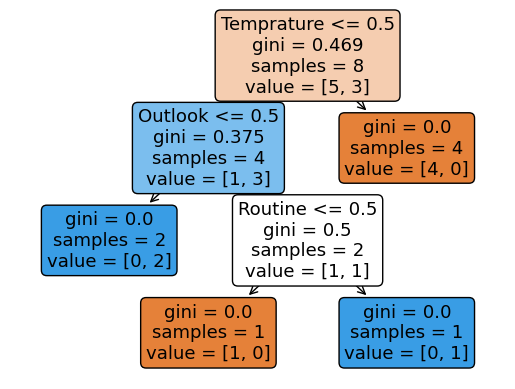

In [138]:
tree.plot_tree(model,rounded=True,filled=True,feature_names=x.columns)